# Ayudantía 2 Capstone

Felipe Cornejo - facornejo@uc.cl

## Uso de openpyxl, csv, pandas y data frame


### Lectura de archivos csv ("comma-separated values")

In [48]:
import csv

#Leemos el archivo de ejemplo usando la librería csv
with open('Ejemplo 2 Ayudantía 2.csv') as csvfile:
    reader = list(csv.DictReader(csvfile, delimiter=";"))
    # reader = list(csv.reader(csvfile, delimiter=";"))
for row in reader:
    print(row)


OrderedDict([('ID_Usuario', '1851'), ('Edad', '23'), ('Comuna', 'Providencia'), ('Plan', '4'), ('Nombre_Usuario', 'Juan')])
OrderedDict([('ID_Usuario', '1577'), ('Edad', '45'), ('Comuna', 'Vitacura'), ('Plan', '2'), ('Nombre_Usuario', 'Fernanda')])
OrderedDict([('ID_Usuario', '1384'), ('Edad', '22'), ('Comuna', 'La Florida'), ('Plan', '4'), ('Nombre_Usuario', 'Cristobal')])
OrderedDict([('ID_Usuario', '1153'), ('Edad', '34'), ('Comuna', 'Macul'), ('Plan', '4'), ('Nombre_Usuario', 'Felipe')])
OrderedDict([('ID_Usuario', '1013'), ('Edad', '51'), ('Comuna', 'Puente Alto'), ('Plan', '2'), ('Nombre_Usuario', 'Manuel')])
OrderedDict([('ID_Usuario', '1015'), ('Edad', '22'), ('Comuna', 'Santiago'), ('Plan', '4'), ('Nombre_Usuario', 'Catalina')])


In [49]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from matplotlib import pyplot as plt

In [50]:
pd.__version__

'0.25.0'

# Pandas
## Data Frame 

Un **data frame** nos permite tener nuestros datos en varias columnas, parecido a una spreadsheet.

Para trabajar con **pandas** y comprender mejor el uso de los data frames, aquí unos links de interés:

* Pueden visitar la documentación de pandas https://pandas.pydata.org/

* Pandas en Stackoverflow https://stackoverflow.com/tags/pandas/hot

* Y una página con las herramientas más útiles de Python (pandas, numpy, csv, etc) y ejemplos https://lectures.quantecon.org

* Cheat Sheet de pandas: https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

Tips and tricks!
* Atajos y funcionalidades de jupyter [link](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/#targetText=Ctrl%20%2B%20Shift%20%2B%20%2D%20will%20split,code%20but%20not%20the%20outputs.&targetText=Select%20Multiple%20Cells%3A,sell%20in%20a%20downwards%20direction.)

In [51]:
# creamos un ejemplo de dataframe

my_df = pd.DataFrame([['Felipe','quimio','1'],['Regina','cajeros','2']], columns = ['nombre','proyecto asignado','grupo'])
my_df

,nombre,proyecto asignado,grupo
0,Felipe,quimio,1
1,Regina,cajeros,2


Si el nombre de la columna no es el más apropiado, podemos renombrar la columna

In [52]:
my_df.rename(columns={'proyecto asignado':'proyecto'},inplace=True)
my_df

,nombre,proyecto,grupo
0,Felipe,quimio,1
1,Regina,cajeros,2


## Data Frame desde un archivo csv

Habitualmente nos interesa tomar un archivo (en csv por ejemplo) y procesarlo como un data frame para aprovechar
las funcionalidades de la librería pandas. Veamos un ejemplo de esto:

In [53]:
# Usamos read_csv para abrir un archivo CSV
# Usando el parámetro "delimiter" podemos separar de distitnas formas dependiendo del archivo
data = pd.read_csv("employees.csv")
# en caso que la data desde el csv no tenga encabezado en la primera fila, se agrega usando el argumento names = [...]

Para explorar los datos usamos, head, tail o sample

In [54]:
data.head() # usamos para ver los primeros elementos del set de datos
#data.tail() # usamos para ver los ultimos elementos
#data.sample(5) # nos selecciona 5 elementos dentro de la data

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


Para obtener el nombre de las columnas utilizamos la funcion columns

In [55]:
data.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

Simplemente al escribir la variable que almacena nuestro dataframe, se genera un print provisto por jupyter

In [56]:
data

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


Si deseamos identificar porciones particulares de datos, podemos utilizar las funciones iloc y loc

In [57]:
# podemos tomar alguna porción particular de filas de datos (entregame entre desde 2 a 4)
data[2:5]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [58]:
# si deseamos seleccionar columnas
data[['First Name', 'Gender']]

,First Name,Gender
0,Douglas,Male
1,Thomas,Male
2,Maria,Female
3,Jerry,Male
4,Larry,Male
5,Dennis,Male
6,Ruby,Female
7,NaN,Female
8,Angela,Female
9,Frances,Female


In [59]:
# podemos seleccionar datos con mayor precision usando iloc o loc
data.iloc[2:5, 0:4]

,First Name,Gender,Start Date,Last Login Time
2,Maria,Female,4/23/1993,11:17 AM
3,Jerry,Male,3/4/2005,1:00 PM
4,Larry,Male,1/24/1998,4:47 PM


In [60]:
data.loc[data.index[2:5], ['First Name', 'Gender']]

,First Name,Gender
2,Maria,Female
3,Jerry,Male
4,Larry,Male


## Operaciones con datos asociados a una columna

In [61]:
data.columns

Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team'],
      dtype='object')

In [62]:
# supongamos que la gente  recibe una giftcard especial del 10% de su sueldo
# Agreguemos una columna que muestre el premio
data['prize'] = data['Salary']*0.1
# se nos informa que los premios han cambiado y debemos agregar el porcentaje de bonus al premio

# renombramos la columna bonus para mayor comodidad
data.columns = ['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus', 'Senior Management', 'Team', 'prize']



data['prize'] = data.prize*(data.Bonus/100) + data.prize
data


,First Name,Gender,Start Date,Last Login Time,Salary,Bonus,Senior Management,Team,prize
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing,10406.604060
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN,6451.560610
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance,14607.536220
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance,15166.004700
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services,10240.694556
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal,12682.325375
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product,7203.145712
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance,5123.017788
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering,11327.243110
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development,15037.446448


## Date time objects

En algunas ocaciones, necesitamos trabajar con las fechas que posee nuestra base de datos (_"aa-mm-dd hh:mm:ss"_). Es importante estandarizar algún formato común, para eso, pandas proporciona la función to_datetime.

In [63]:
data['Start Date'] = pd.to_datetime(data['Start Date'], dayfirst = True)
data.dtypes

First Name                   object
Gender                       object
Start Date           datetime64[ns]
Last Login Time              object
Salary                        int64
Bonus                       float64
Senior Management            object
Team                         object
prize                       float64
dtype: object

Podriamos seleccionar aquellos trabajadores que comenzaron sus labores a partir de determinada fecha

In [64]:
seleccion_fecha = data[(data['Start Date'] > '2012-01-01 00:00:00')]
seleccion_fecha

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus,Senior Management,Team,prize
7,NaN,Female,2015-07-20,10:43 AM,45906,11.598,NaN,Finance,5123.017788
15,Lillian,Female,2016-05-06,6:09 AM,59414,1.256,False,Product,6016.023984
22,Joshua,NaN,2012-08-03,1:58 AM,90816,18.816,True,Client Services,10790.393856
23,NaN,Male,2012-06-14,4:19 PM,125792,5.042,NaN,NaN,13213.443264
25,NaN,Male,2012-08-10,1:12 AM,37076,18.576,NaN,Client Services,4396.323776
39,NaN,Male,2016-01-29,2:33 AM,122173,7.797,NaN,Client Services,13169.882881
41,Christine,NaN,2015-06-28,1:08 AM,66582,11.308,True,Business Development,7411.109256
53,Alan,NaN,2014-03-03,1:28 PM,40341,17.578,True,Finance,4743.214098
63,Matthew,Male,2013-02-01,10:33 PM,35203,18.040,False,Human Resources,4155.362120
66,Nancy,Female,2012-12-15,11:57 PM,125250,2.672,True,Business Development,12859.668000


## Groupby functions

En algunas ocaciones (si no es en la mayoría), nos interesa agrupar los datos bajo algún dato en particular. Por ejemplo si contamos con una lista de empleados que pertenecen a distintas áreas, podría resultar interesante observar cuáles son los empleados que pertenecen a cada área de la empresa y algún estadístico relevante.

In [65]:
# podemos agrupar por alguna característica en particular de columna usando groupby

mi_grupo = data.groupby(['Team'])
mi_grupo.count()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus,Senior Management,prize
Team,,,,,,,,
Business Development,99,90,101,101,101,101,99,101
Client Services,100,90,106,106,106,106,100,106
Distribution,77,72,90,90,90,90,77,90
Engineering,86,84,92,92,92,92,86,92
Finance,97,85,102,102,102,102,97,102
Human Resources,85,82,91,91,91,91,85,91
Legal,86,69,88,88,88,88,86,88
Marketing,91,81,98,98,98,98,91,98
Product,92,85,95,95,95,95,92,95


Parece ser que los valores de los datos presentes en nuestras columnas no coinciden. **¿Porqué será esto?** 


 

Si tenemos NaN values debemos 'limpiar' nuestros datos de aquellos que podrian causarnos conflictos.

Usando **notnull** podemos redefinir el data frame y hacer una nueva agrupación.

In [66]:
# En la funcion, simplemente agrega las columnas que te interesa que no tengan datos nulos
team = data[pd.notnull(data['First Name']) & (data['Team']) & (data['Gender'])]

In [67]:
team.groupby(['Team']).count() # podemos contar cuantos tenemos, util para hacer gráficos

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus,Senior Management,prize
Team,,,,,,,,
Business Development,88,88,88,88,88,88,88,88
Client Services,85,85,85,85,85,85,85,85
Distribution,60,60,60,60,60,60,60,60
Engineering,79,79,79,79,79,79,79,79
Finance,80,80,80,80,80,80,80,80
Human Resources,76,76,76,76,76,76,76,76
Legal,67,67,67,67,67,67,67,67
Marketing,74,74,74,74,74,74,74,74
Product,83,83,83,83,83,83,83,83


Podriamos considerar un fitro más "rebuscado", por ejemplo, deseamos observar por cada grupo la lista de de trabajadores en orden según su fecha de incorporación "Start Date"

In [68]:
grupos_ordenados_fecha = team.groupby(['Team']).apply(lambda _df: _df.sort_values(by=['Start Date'], ascending = False))
grupos_ordenados_fecha

First Name  Gender Start Date Last Login Time  \
Team                                                                     
Business Development 872     Brenda  Female 2015-01-18         4:39 PM   
                     487     Cheryl  Female 2014-03-12         9:27 AM   
                     317      Kathy  Female 2013-12-18         3:09 PM   
                     973    Russell    Male 2013-10-05        11:08 PM   
                     893      Frank    Male 2013-07-27         4:32 PM   
...                             ...     ...        ...             ...   
Sales                427      Frank    Male 1981-10-01         1:30 PM   
                     592     Justin    Male 1981-05-24        11:15 PM   
                     739     Carlos    Male 1981-01-25        10:00 AM   
                     964      Bruce    Male 1980-07-05         8:00 PM   
                     45       Roger    Male 1980-04-17        11:32 AM   

                          Salary   Bonus Senior Management  \
Team                                                         
Business Development 872   73749  19.332             False   
                     487   71751  15.918             False   
                     317  132381   8.340             False   
                     973  137359  11.105             False   
                     893   91406   5.681              True   
...                          ...     ...               ...   
Sales                427   71853   8.037              True   
                     592   78351  15.221             False   
                     739  138598  14.737             False   
                     964   35802  12.391              True   
                     45    88010  13.886              True   

                                          Team         prize  
Team                                                          
Business Development 872  Business Development   8800.615668  
                     487  Business Development   8317.232418  
                     317  Business Development  14342.157540  
                     973  Business Development  15261.271695  
                     893  Business Development   9659.877486  
...                                        ...           ...  
Sales                427                 Sales   7762.782561  
                     592                 Sales   9027.680571  
                     739                 Sales  15902.318726  
                     964                 Sales   4023.822582  
                     45                  Sales  10023.106860  

[764 rows x 9 columns]

In [69]:
business = grupos_ordenados_fecha[grupos_ordenados_fecha.Team == 'Business Development']
business

First Name  Gender Start Date Last Login Time  \
Team                                                                     
Business Development 872     Brenda  Female 2015-01-18         4:39 PM   
                     487     Cheryl  Female 2014-03-12         9:27 AM   
                     317      Kathy  Female 2013-12-18         3:09 PM   
                     973    Russell    Male 2013-10-05        11:08 PM   
                     893      Frank    Male 2013-07-27         4:32 PM   
...                             ...     ...        ...             ...   
                     950      Paula  Female 1983-05-21        11:42 AM   
                     511        Joe    Male 1983-04-07         7:32 AM   
                     368    Marilyn  Female 1982-12-17        12:10 PM   
                     536   Clarence    Male 1982-08-26         9:47 AM   
                     411      Kevin    Male 1981-06-23         8:26 PM   

                          Salary   Bonus Senior Management  \
Team                                                         
Business Development 872   73749  19.332             False   
                     487   71751  15.918             False   
                     317  132381   8.340             False   
                     973  137359  11.105             False   
                     893   91406   5.681              True   
...                          ...     ...               ...   
                     950   58423  10.833             False   
                     511   62161   8.130              True   
                     368  147183   8.748             False   
                     536  146589   4.905              True   
                     411  134598  11.699             False   

                                          Team         prize  
Team                                                          
Business Development 872  Business Development   8800.615668  
                     487  Business Development   8317.232418  
                     317  Business Development  14342.157540  
                     973  Business Development  15261.271695  
                     893  Business Development   9659.877486  
...                                        ...           ...  
                     950  Business Development   6475.196359  
                     511  Business Development   6721.468930  
                     368  Business Development  16005.856884  
                     536  Business Development  15377.919045  
                     411  Business Development  15034.462002  

[88 rows x 9 columns]

Vaya que interesante!!, ojalá pudieramos guardar esta selección en algún archivo para enviarlo y usarlo posteriormente :(

Pues **pandas** también lo permite :D

In [71]:
writer = pd.ExcelWriter('business.xlsx') # nombre del archivo

business.to_excel(writer, sheet_name ='datos') #nombre de la hoja

writer.save() 

### Algunos Estadisticos y funciones generales

In [72]:
team.groupby(['Team']).Salary.mean()







#team.groupby(['Team']).Salary.agg(['min','max','mean'])
#team.agg(['min','max','mean'])
#team.describe()

Team
Business Development    90520.397727
Client Services         89336.658824
Distribution            85849.100000
Engineering             94369.405063
Finance                 94519.075000
Human Resources         91145.171053
Legal                   88066.402985
Marketing               90764.081081
Product                 86935.963855
Sales                   91724.819444
Name: Salary, dtype: float64

# Matplotlib, Seaborn
Pueden visitar la documentación de Matplotlib https://matplotlib.org

Pueden visitar la documentación de seaborn https://seaborn.pydata.org

Para este ejemplo, usaremos https://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot

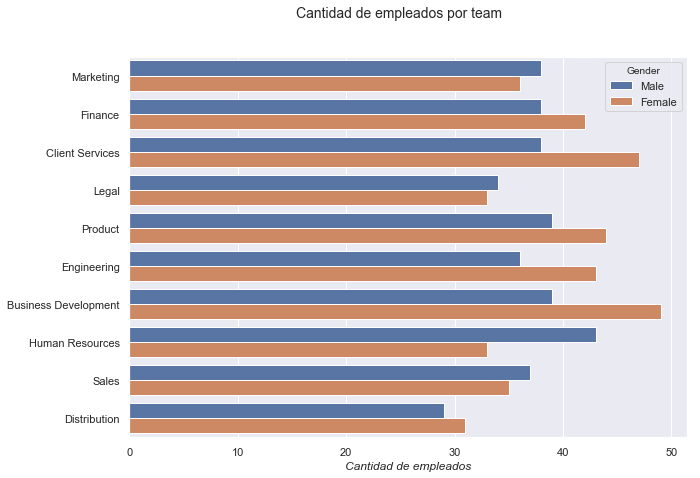

In [73]:
# declaramos el tamaño de la figura
fig = plt.figure(figsize=(10, 7))
title = fig.suptitle("Cantidad de empleados por team", fontsize=14)
sns.set(style="darkgrid") # podemos agregar un estilo usando seaborn
# usando seaborn aprovechamos la figura para represntar mejor los datos
#cp = sns.countplot(y = 'Team', data=team) # para ver la tendencia general
cp = sns.countplot(y = 'Team', hue = 'Gender',data=team)# tendencia por genero
cp.set_xlabel("Cantidad de empleados", style='italic')
cp.set_ylabel("")

# Openpyxl

In [74]:
from openpyxl import Workbook, load_workbook
from openpyxl.styles.borders import Border, Side
from openpyxl.styles import Font,Alignment
from datetime import date, timedelta
import os




wb = load_workbook(filename = 'Datos.xlsx')#Cargamos el libro de Excel
ws = wb['Alturas']#Obtenemos la hoja que nos interesa leer

alturas = []
for c in range(5,15):
    alturas.append(ws.cell(row=5, column=c).value)#Iteramos sobre las celdas de la hoja para obtener los datos
print("Alturas: {}".format(alturas))
s = 0
for a in alturas:#Calculamos el promedio de las alturas
    s += a
promedio = s/len(alturas)
print("Promedio: {}".format(promedio))

resultados = [] #Qué pacientes están por sobre la altura promedio de la muestra?
for c in range(5,15):
    if ws.cell(row=5, column=c).value > promedio:#Guardamos la información como 1 si está por sobre y 0 si no
        resultados.append(1)
    else:
        resultados.append(0)
print("Resultados: {}".format(resultados))

wb = Workbook()#Creamos un nuevo libro de Excel en donde
by_default_sheet = wb['Sheet']#Obtenemos la hoja que viene por defecto en el libro
del wb['Sheet']#Removemos esa hoja del libro (podríamos también solo haber cambiado su nombre)
ws = wb.create_sheet("Resultados",index=0)#Creamos una nueva hoja llamada Resultados en la primera posición de las hojas


thin_border = Border(left=Side(style='thin'), right=Side(style='thin'),
                     top=Side(style='thin'), bottom=Side(style='thin')) #Definimos un formato para el borde de las celdas
cell = ws.cell(row=5, column=4, value="Resultados")#Escribimos un título para la tabla que estamos generando
cell.font = Font(bold=True, )#Que la letra de la celda esté en negrita
cell.border = thin_border#Fijamos el borde que habíamos definido
cell.alignment = Alignment(horizontal='left')#Definimos que el texto esté alineado con el margen izquierdo

for i in range(len(resultados)):#Escribimos títulos para cada columna de la tabla de resultados
    cell = ws.cell(row=4, column=5 + i, value="Paciente {}".format(i+1))
    cell.font = Font(bold=False, )
    cell.border = thin_border
    cell.alignment = Alignment(horizontal='left')

for i in range(len(resultados)):#Escribimos los resultados una fila más abajo
    cell = ws.cell(row=5, column=5 + i, value=resultados[i])
    cell.font = Font(bold=False, )
    cell.border = thin_border
    cell.alignment = Alignment(horizontal='left')

try:
    #module_path = os.path.abspath(__file__)#Obtenemos el path de la carpeta en donde se está ejecutando este módulo
    file_name = "Resultados {}.xlsx".format(date.today())#Definimos el nombre del archivo
    #fn = os.path.join(module_path, file_name)#Generamos el path en el cual se guardará el archivo
    wb.save(file_name)#Guardamos el nuevo libro de excel
except Excpetion as e:#Posibles errores por los que podría fallar la escritura del archivo es si hay un error con el path o si el archivo ya existe y está abierto
    print(e)
    print("Ha ocurrido un problema al intentar guardar el archivo")

Alturas: [163, 154, 181, 145, 184, 176, 153, 142, 151, 180]
Promedio: 162.9
Resultados: [1, 0, 1, 0, 1, 1, 0, 0, 0, 1]


# Uso de la librería Numpy

In [75]:
import numpy as np

In [76]:
A = np.zeros((3,8))#Creamos una matriz de 3x8 con puros 0
A[:,4] = 6 #Llenamos la quinta columna con valores iguales a 6
A[2,:] = 22 #Llenamos la tercera fila con valores iguales a 22
print("A: ")
print(A)
print("dimensiones de A: {0}".format(np.shape(A)))#Imprimimos la forma de la matriz

A: 
[[ 0.  0.  0.  0.  6.  0.  0.  0.]
 [ 0.  0.  0.  0.  6.  0.  0.  0.]
 [22. 22. 22. 22. 22. 22. 22. 22.]]
dimensiones de A: (3, 8)


In [77]:
B = np.ones((2,8))#Creamos una matriz de 2x8 con puros 1
B[0,:] = 3 #LLenamos la primera fila con valores iguales a 3
B[1,5] = 70 #Definimos un valor de 70 para un coeficiente específico de la matriz
B[-1,-1] = 10 #LLenamos el elemento de la última fila y la última columna con un 10
B[1,0] = 100 #Definimos un valor de 100 para un coeficiente específico de la matriz

print("B: ")
print(B)
print("B[-1,:] (última fila de B):")
print(B[-1,:])

B: 
[[  3.   3.   3.   3.   3.   3.   3.   3.]
 [100.   1.   1.   1.   1.  70.   1.  10.]]
B[-1,:] (última fila de B):
[100.   1.   1.   1.   1.  70.   1.  10.]


In [78]:
#Para apilar matrices
C = np.vstack((A,B)) #verticalmente (con hstack se hace horizontalmente)
print("C: ")
print(C)
print("dimensiones de C: {0}".format(np.shape(C)))

C: 
[[  0.   0.   0.   0.   6.   0.   0.   0.]
 [  0.   0.   0.   0.   6.   0.   0.   0.]
 [ 22.  22.  22.  22.  22.  22.  22.  22.]
 [  3.   3.   3.   3.   3.   3.   3.   3.]
 [100.   1.   1.   1.   1.  70.   1.  10.]]
dimensiones de C: (5, 8)


In [79]:
#Operaciones básicas

W = np.full((2,2),12)
print(W)
W = np.full((2,2),12,dtype=float) #IMPORTANTE: cambiamos el type de los elementos dentro de la matriz
print(W)
#Multiplicación por un escalar
W = W*(0.25)
print("W:")
print(W)

[[12 12]
 [12 12]]
[[12. 12.]
 [12. 12.]]
W:
[[3. 3.]
 [3. 3.]]


In [80]:
#Suma y resta
Q = np.zeros((2,2))
Q = np.identity(2)
Q[0,:] = 2
print("Q:")
print(Q)

Q:
[[2. 2.]
 [0. 1.]]


In [81]:
#Multiplicación término a término
G = Q*W
print("Multiplicación término a término entre Q y W")
print(G)

Multiplicación término a término entre Q y W
[[6. 6.]
 [0. 3.]]


In [82]:
#Poducto punto (para arreglos de dos dimensiones es equivalente al producto matricial)
G = np.dot(Q,W)
print("Multiplicación de las matrices Q y W")
print(G)

Multiplicación de las matrices Q y W
[[12. 12.]
 [ 3.  3.]]


In [83]:
L = np.random.randint(0,10,(2,4))
print("L:")
print(L)
print(np.shape(L))
#Transponer una matriz
L = np.transpose(L)
print(L)
print(np.shape(L))

L:
[[8 9 0 0]
 [1 7 8 9]]
(2, 4)
[[8 1]
 [9 7]
 [0 8]
 [0 9]]
(4, 2)


In [84]:
#Inversa de una matriz
B = 2*np.identity(3)
P = np.linalg.inv(B)
print(P)

# #Qué pasa si tratamos de invertir una matriz que no es invertigle?
# B = np.zeros((3,3))
# B[0,:] = 1
# P = np.linalg.inv(B)
# print(P)

[[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  0.5]]


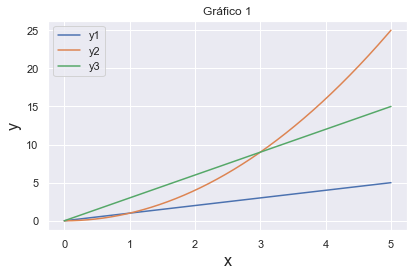

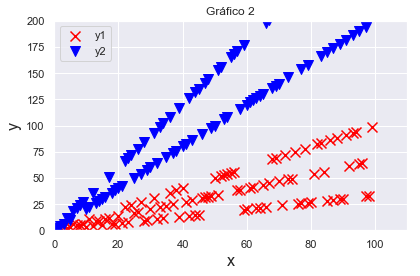

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint

x = np.linspace(0,5,1000) #Generar un arreglo de 1000 elementos que van desde el 0 al 5 incluido

#Definimos funciones que vamos a graficar sobre el dominio x
def f1(x):
    return x

def f2(x):
    return x**2

def f3(x):
    return 3*x

#Guardamos los valores que toma la función para cada elemento de x en variales y
y1 = f1(x)
y2 = f2(x)
y3= f3(x)

plt.figure("Figura 1")#Generamos una figura ("ventana de ploteo")
plt.plot(x,y1,label="y1")#Graficamos (dibujamos) y1
plt.plot(x,y2,label="y2")#Graficamos (dibujamos) y2
plt.plot(x,y3,label="y3")#Graficamos (dibujamos) y3
plt.title("Gráfico 1")#Le ponemos título al gráfico
plt.xlabel("x",fontsize=16)#Le ponemos título al eje de las abscisas
plt.ylabel("y",fontsize=16)#Le ponemos título al eje de las ordenadas
plt.tight_layout()#Este comando permite, en muchos casos, ajustar la visualización del gráfico para que quepa dentro de la figura
plt.legend()#Anotamos etiquetas para las curvas en el gráfico
plt.show()#Mostramos (si no no se abre ni se ve nada) la figura con el gráfico



x = [i for i in range(100)]#Definimos un dominio x como una lista de elementos

y1 = [randint(1,3)*i/3 for i in range(100)]#Definimos valores para graficar en función de x
y2 = [randint(2,3)*i for i in range(100)]


plt.figure("Figura 2")#Creamos la figura
plt.scatter(x,y1,label="y1",marker="x",color = "red",s = 100)#Graficamos y1 en un diagrama de dispersión (scatter plot)
plt.scatter(x,y2,label="y2",marker="v",color = "blue",s = 100)#Graficamos y2 en un diagrama de dispersión (scatter plot)
plt.xlim(0,110)#Definimos los límites para x con los cuales se va a mostrar el gráfico
plt.ylim(0,200)#Definimos los límites para y con los cuales se va a mostrar el gráfico
plt.title("Gráfico 2")#Le ponemos título al gráfico
plt.xlabel("x",fontsize=16)#Le ponemos título al eje de las abscisas
plt.ylabel("y",fontsize=16)#Le ponemos título al eje de las ordenadas
plt.tight_layout()#Este comando permite, en muchos casos, ajustar la visualización del gráfico para que quepa dentro de la figura
plt.legend()#Anotamos etiquetas para las curvas en el gráfico
plt.show()#Mostramos (si no no se abre ni se ve nada) la figura con el gráfico


Número de nodos en G: 5
Número de arcos en G: 4


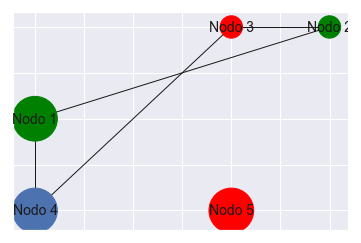

In [86]:
# Importamos los módulos que vamos a utilizar
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#Creamos el grafo
G=nx.Graph()#Para crear un grafo no dirigido.
# G=nx.DiGraph()#Para crear un grafo no dirigido.

# Creamos los nodos #Les podemos poner cualquier nombre
G.add_node("Nodo 1",pos=(2,1))
G.add_node("Nodo 2",pos=(5,2))
G.add_node("Nodo 3",pos=(4,2))
G.add_node("Nodo 4",pos=(2,0))
G.add_node("Nodo 5",pos=(4,0))



# Creamos lo arcos
G.add_edge("Nodo 4","Nodo 3",c=1)
G.add_edge("Nodo 2","Nodo 1",c=1)
G.add_edge("Nodo 2","Nodo 3",c=3)
G.add_edge("Nodo 1","Nodo 4",c=3)




#Obtenemos las posiciones de los nodos (en un diccionario)
pos=nx.get_node_attributes(G,'pos')

#Podemos imprimir el número de nodos del grafo
print("Número de nodos en G: {}".format(len(G)))
# print("Número de nodos en G: {}".format(G.number_of_nodes()))
print("Número de arcos en G: {}".format(G.number_of_edges()))

#DEFINICIÓN DE COLORES PARA LOS NODOS
lista_de_nodos_verdes = ["Nodo 1","Nodo 2"]
lista_de_nodos_azules = ["Nodo 4"]

nodes_color_map = [] #En esta lista vamos a anotar los colores que les corresponden a cada nodo para luego darle esta información a la función que grafica el grafo
for node in G:
    if node in lista_de_nodos_azules:
        nodes_color_map.append("b")  # Podemos definir colores con algunos códigos específicos
        # color_map.append("indigo")  # Podemos definir colores por nombre (para algunos colores)
        # color_map.append("#FF0099") #Podemos definir colores con su código hexadecimal
        # nodes_color_map.append((0.5,0.5,0.5)) # Podemos definir colores por su representación en RGB en una tupla
    elif node in lista_de_nodos_verdes:
        nodes_color_map.append('green')
    else:
        nodes_color_map.append('red')

# DEFINICIÓN DE TAMAÑOS PARA LOS NODOS
lista_de_nodos_grandes = ["Nodo 1", "Nodo 5", "Nodo 4"]
lista_de_nodos_pequeños = ["Nodo 3", "Nodo 2"]

nodes_size_map = []
for node in G.nodes():
    if node in lista_de_nodos_grandes:
        nodes_size_map.append(2000)
    elif node in lista_de_nodos_pequeños:
        nodes_size_map.append(500)
    else:
        nodes_size_map.append(1000)


#En la siguiente línea se crea el gráfico del grafo definiendo varios parámetros para la visualización (algunos de estos parámetros pueden omitirse)
plt.figure("Grafo 1")
nx.draw_networkx(G,pos,with_labels=True, node_color = nodes_color_map,node_size=nodes_size_map,node_shape="o", font_size=14, font_family='sans-serif')
plt.show()


### Herramientas extra que podrían resultar útiles.

In [87]:
from datetime import date,timedelta
import time as tm
import random
import numpy as np

start = tm.time() #Guardamos en una variable el tiempo actual
#tm.time() da el tiempo en segundos desde la “Epoch” (una fecha en específico definida en la librería).
tm.sleep(1)#Le decimos al programa que "duerma" (haga una pausa) por 1 segundo
end = tm.time() #Guardamos en una variable el tiempo actual
print("{} segundos".format(end-start)) #Imprimimos el tiempo que ha transcurrido entre que guardamos el valor del tiempo actual en la variable start y en la variable end

today = date.today() #Guardamos la fecha de hoy en la variable today
print(today)
print(today + timedelta(days=5))#Imprimimos la fecha correspondiente a 5 días a partir de hoy

random.seed(1)#Fijamos la "semilla" del generad de número aleatorios
# Esto hace que, cuando corran el código más de una vez, las funciones que entregan números aleatorios den siempre el mismo valor
print(random.randint(10,30))#Imprimimos un número aleatorio entre 10 y 30

l = [1,2,3] #Definimos una lista de eventos o escenarios
p = [0.9,0.1,0.0]#Definimos una lista de probabilidades para asignar a cada evento (deben sumar 1.0)
print(np.random.choice(l,p=p))#Con la función choice se selecciona un elemento de l según las probabilidades p

x = [random.gauss(100,20) for i in range(3)]#Generamos una lista de realizaciones de una distribución normal de media 100 y desviación estándar 20
print(x)
x = [random.uniform(0,10) for i in range(3)]#Generamos una lista de realizaciones de una distribución uniforme entre 0 y 10
print(x)


1.00030517578125 segundos
2019-08-22
2019-08-27
14
1
[67.34161873566067, 84.83120296405345, 109.24150129421164]
[7.609624449125755, 4.722452435761166, 3.7961522332372777]
